In [1]:
import emcee
import numpy as np
import matplotlib.pyplot as plt
from getdist import plots, MCSamples

In [2]:
def load_and_process_csv(file_path):
    data = np.loadtxt(file_path, delimiter=',', skiprows=2)
    if data.shape[1] < 2:
        raise ValueError(f"Data in {file_path} must have at least two columns for 2D plotting")
    return data

def load_acceptance_rate(file_path):
    acceptance_rate = np.loadtxt(file_path, delimiter=',', skiprows=1, max_rows=1)[0]
    return acceptance_rate

In [3]:
# Paths to the CSV files
csv_file_paths_hmc = ['HMC_data/HMC_samples_2D_10000.csv', 'HMC_data/HMC_samples_2D_50000.csv', 'HMC_data/HMC_samples_2D_100000.csv']  # Replace with your actual file paths

# Load and process each CSV file
HMC_data = [load_and_process_csv(file_path) for file_path in csv_file_paths_hmc]
HMC_acceptance_rate = [load_acceptance_rate(file_path) for file_path in csv_file_paths_hmc]
# Paths to the CSV files
csv_file_paths_mh = ['MH_data/MH_samples_2D_10000.csv', 'MH_data/MH_samples_2D_50000.csv', 'MH_data/MH_samples_2D_100000.csv']  # Replace with your actual file paths

# Load and process each CSV file
MH_data = [load_and_process_csv(file_path) for file_path in csv_file_paths_mh]
MH_acceptance_rate = [load_acceptance_rate(file_path) for file_path in csv_file_paths_mh]


HMC_corr_time = [emcee.autocorr.integrated_time(HMC_data[i], has_walkers=False, quiet=True)[0] for i in range (0,len(HMC_acceptance_rate))]
MH_corr_time = [emcee.autocorr.integrated_time(MH_data[i], has_walkers=False, quiet = True)[0] for i in range (0,len(MH_acceptance_rate))]

The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [278.03355771  29.58067296]


In [4]:
MH_acceptance_rate

[0.7283, 0.76666, 0.78273]

In [5]:
MH_corr_time

[278.03355771111427, 550.585764766985, 89.19317750386902]

In [6]:
HMC_corr_time

[14.935835322004289, 16.90653552537352, 17.504493644969024]

In [7]:
HMC_acceptance_rate

[0.9995, 0.99962, 0.9995]

In [8]:
# Get the getdist MCSamples objects for the samples, specifying same parameter
# names and labels; if not specified weights are assumed to all be unity
names = ['x','y']
labels =  ['x', 'y']
samples = MCSamples(samples=HMC_data[2],names = names, labels = labels, label = 'HMC')
samples2 = MCSamples(samples=MH_data[2],names = names, labels = labels, label='MH')

Removed no burn in
Removed no burn in


In [9]:
plt.rcParams['font.family'] = 'sans-serif'

# Set font size
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 12

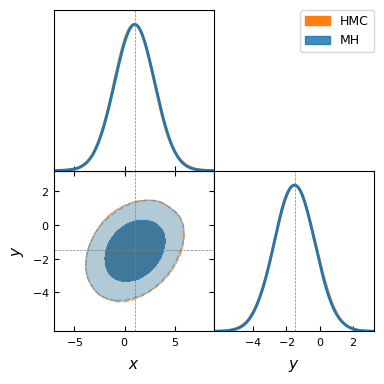

In [10]:
g = plots.get_subplot_plotter(subplot_size=2)

g.settings.line_styles = 'tab10'
g.settings.solid_colors='tab10'
g.triangle_plot([samples, samples2], filled=True, contour_lws=2, markers={'x':1, 'y':-1.5}, **{"lw" : 1.0, "ls" : "--", "c" : "k", "alpha" : 0.5})

In [11]:
mean = np.mean(MH_data[2], axis=0)  # Calculate the mean for each dimension
print(mean)
# Calculate the covariance matrix
covariance = np.cov(MH_data[2].T) 
print(covariance)

[ 1.00461935 -1.51658416]
[[3.96936742 0.71049933]
 [0.71049933 1.4675159 ]]


In [12]:
mean = np.mean(HMC_data[2], axis=0)  # Calculate the mean for each dimension
print(mean)
# Calculate the covariance matrix
covariance = np.cov(HMC_data[2].T) 
print(covariance)

[ 0.99698821 -1.51179739]
[[3.9923825  0.69869348]
 [0.69869348 1.50816423]]
